In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

In [3]:
# Connect to SQLite database
con = sqlite3.connect('./data/sd_competencia/sd_competencia_db.db')
cur = con.cursor()

In [4]:
# Create dataframe from connection

df = pd.read_sql_query('SELECT * FROM Demanda_Historica', con)
df.head()


id_llegada        fecha_llegada hora_llegada  tipo_vehiculo  CCA0001_SN_01  \
0           1  2023-03-01 00:00:00     00:36:36         Camion              1   
1           2  2023-03-01 00:00:00     06:30:45         Camion              0   
2           3  2023-03-01 00:00:00     06:32:33         Camion              0   
3           4  2023-03-01 00:00:00     07:26:02  Tracto-Camion              0   
4           5  2023-03-01 00:00:00     07:46:43  Tracto-Camion              3   

   CCA0001_SB_01  CCA0001_SG_01  CCA0001_SC_01  CCA0001_SN_02  CCA0001_SB_02  \
0              0              3              0              0              0   
1              2              2              0              5              5   
2              0              2              3              3              0   
3              6              0              0              0              0   
4              0              1              2              3              0   

   ...  CT0008_03033  CT0008_03034  CT0008_03035  CT0008_03036  CT0008_03041  \
0  ...            10             0             0             0             0   
1  ...             0             0             0             0             0   
2  ...             6             0             4             8             0   
3  ...             8             0             0             7             0   
4  ...             8             0             0             0             0   

   CT0008_03042  CT0008_03043  CT0008_03044  CT0008_03045  CT0008_03046  
0             0             0             7             0             0  
1             6             3             8             0             0  
2             0             4             0             0             0  
3             0             0             0             0             0  
4             0             0             0             0             0  

[5 rows x 1271 columns]

In [5]:
# Dropping unnecessary columns

df = df.drop(columns={'id_llegada', 'tipo_vehiculo', 'hora_llegada'})


In [6]:
# Grouping SKUs by date

df['fecha_llegada'] = pd.to_datetime(df['fecha_llegada'])

df = df.groupby('fecha_llegada').sum().reset_index()

df = df.set_index('fecha_llegada')


df.head()


CCA0001_SN_01  CCA0001_SB_01  CCA0001_SG_01  CCA0001_SC_01  \
fecha_llegada                                                               
2023-03-01               160            232            167            198   
2023-03-02               202            212            194            236   
2023-03-03               162            151            166            143   
2023-03-04               210            212            227            185   
2023-03-05                32             15             39             37   

               CCA0001_SN_02  CCA0001_SB_02  CCA0001_SG_02  CCA0001_SC_02  \
fecha_llegada                                                               
2023-03-01               200            196            146            153   
2023-03-02               178            140            135            158   
2023-03-03               145            182            170            175   
2023-03-04               171            195            268            215   
2023-03-05                29             28             21             22   

               CCA0001_SN_03  CCA0001_SB_03  ...  CT0008_03033  CT0008_03034  \
fecha_llegada                                ...                               
2023-03-01               130             75  ...           129            43   
2023-03-02               157             71  ...            54           132   
2023-03-03               118             80  ...            63            82   
2023-03-04               118             86  ...           113            95   
2023-03-05                15             13  ...             9            15   

               CT0008_03035  CT0008_03036  CT0008_03041  CT0008_03042  \
fecha_llegada                                                           
2023-03-01               58            74            80            28   
2023-03-02               46            41            84            58   
2023-03-03               95            60           102            49   
2023-03-04               44            56           104            49   
2023-03-05                0            17             8            21   

               CT0008_03043  CT0008_03044  CT0008_03045  CT0008_03046  
fecha_llegada                                                          
2023-03-01              102            89            16            73  
2023-03-02               85            66            48            86  
2023-03-03              107            69            62            84  
2023-03-04               95            58            49           137  
2023-03-05               41             7            10             0  

[5 rows x 1267 columns]

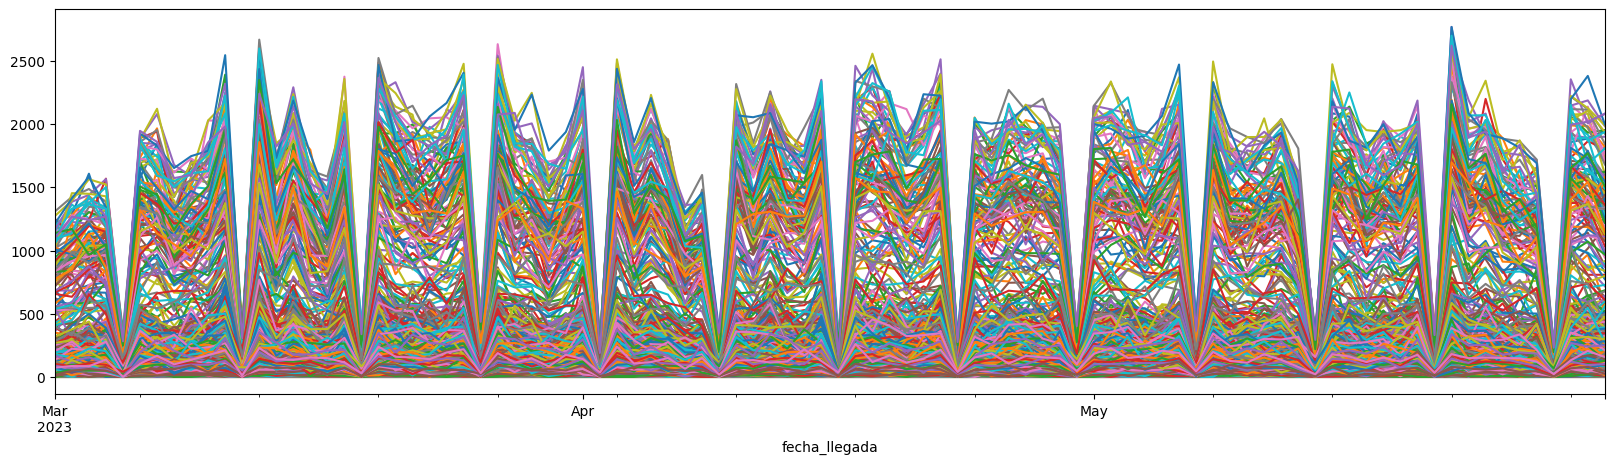

In [7]:
# Plotting general demand

ax = df.plot(figsize=(20, 5))

ax.legend_.remove()

plt.show()

In [8]:
df.to_csv('./data/sd_competencia/demanda_CEDI_simplificado.csv', encoding='utf-8')

In [9]:
# Plot demand by subcategory

sku_subcats = pd.read_sql_query('select sku, subcategoria from Catalogo_Productos group by sku;', con)

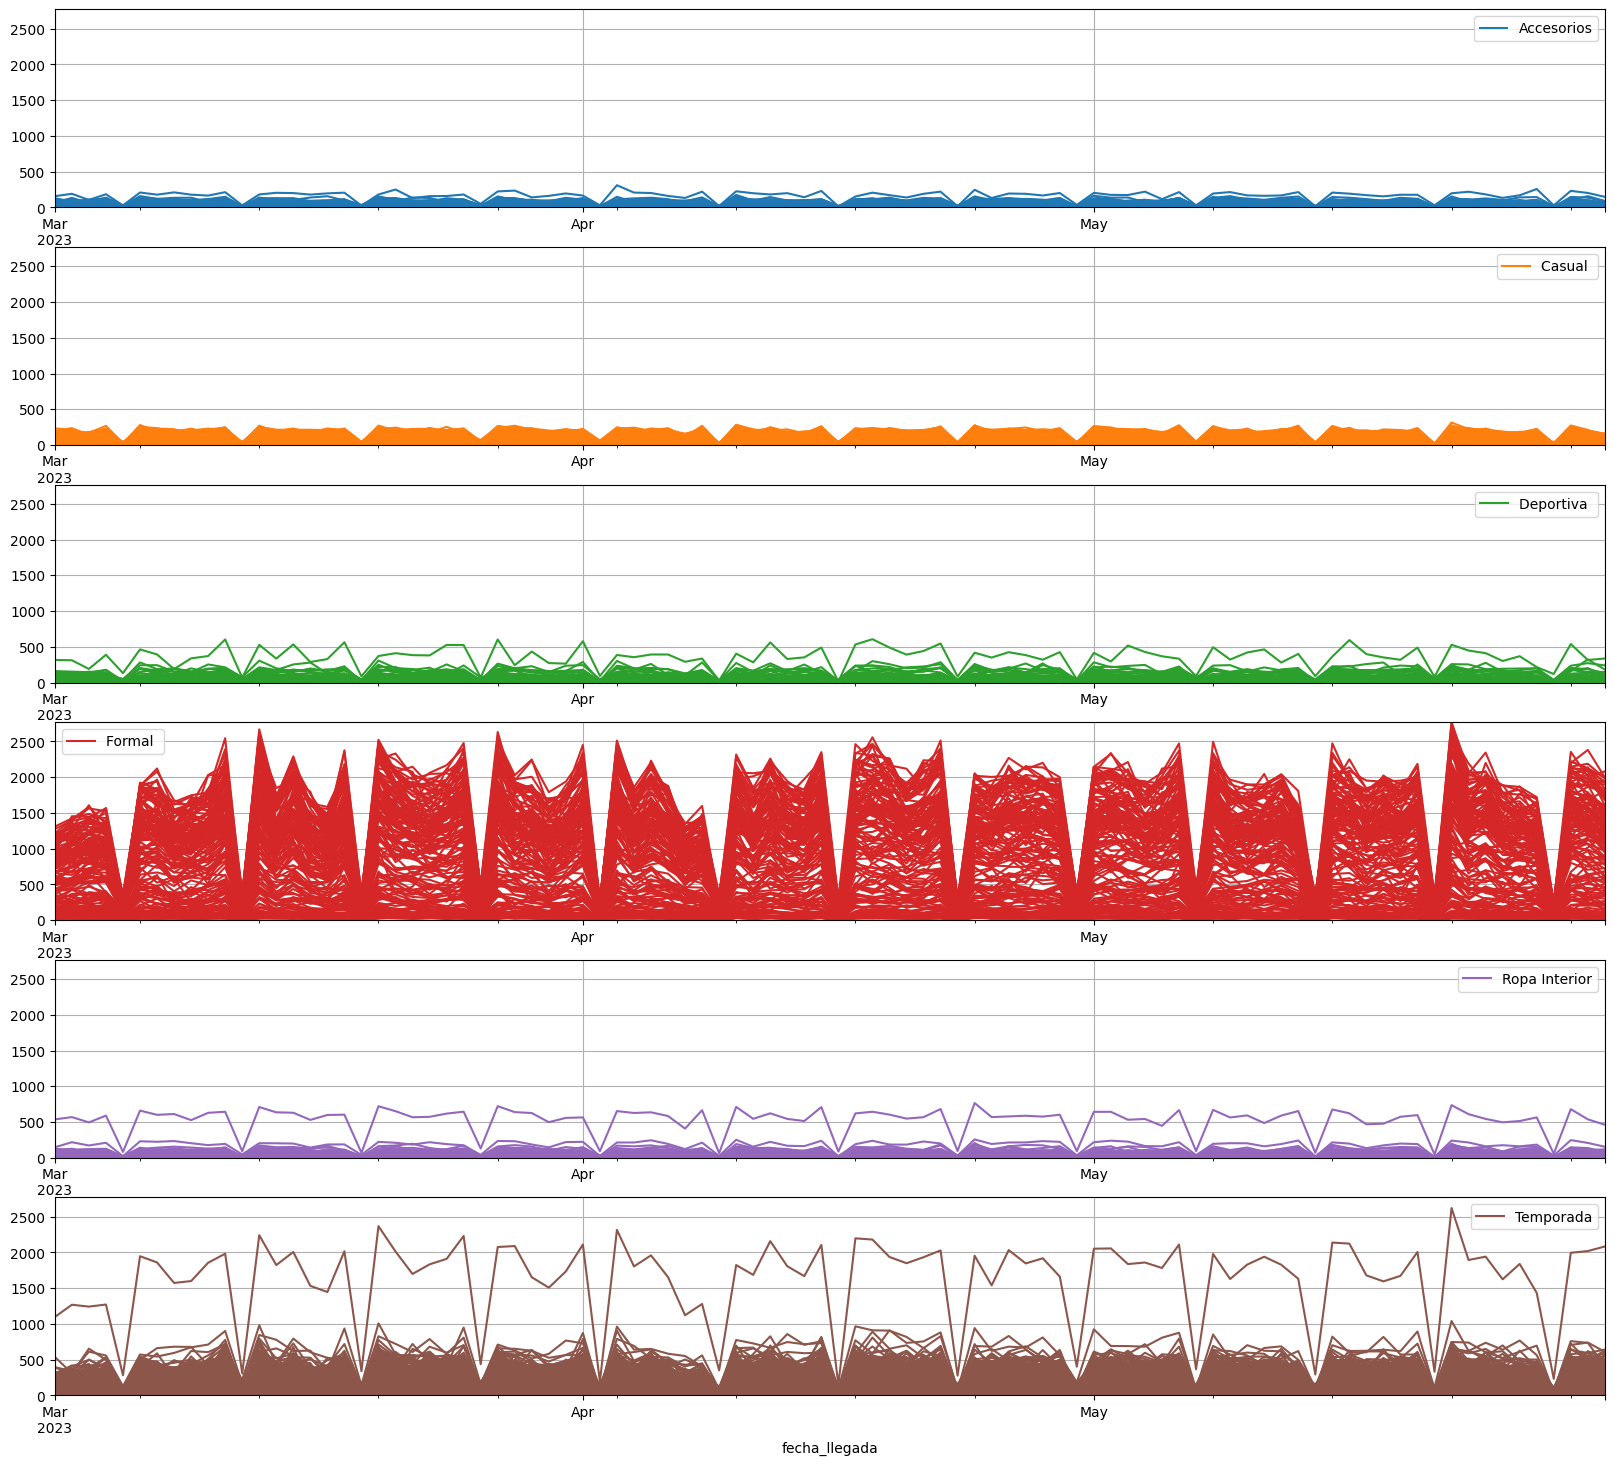

In [10]:

sku_subcats_dict = sku_subcats.set_index('sku')['subcategoria'].to_dict()

# Assign colors by subcategory
unique_subcategories = sku_subcats['subcategoria'].unique()

# Subplots
fig, axs = plt.subplots(len(sku_subcats['subcategoria'].unique()), figsize=(20, len(sku_subcats['subcategoria'].unique()) * 3))

# Calculate the overall max demand across all SKUs in the DataFrame
global_max_demand = df.max().max()

# Define color palette
colors = plt.cm.tab10(range(len(unique_subcategories)))  # Assign a color per category

# Loop over each category to create a separate DataFrame for each and plot it
for idx, category in enumerate(unique_subcategories):
    # Select SKUs that belong to the current category
    skus_in_category = [sku for sku, cat in sku_subcats_dict.items() if cat == category]
    
    # Filter the main DataFrame to include only these SKUs
    subcategory_df = df[skus_in_category]
    
    # Plot the sum of demand for this category over time
    subcategory_df.plot(ax=axs[idx], color=colors[idx], label=category, legend=False)
    
    # Set the y-limit for each subplot to the global maximum demand
    axs[idx].set_ylim(0, global_max_demand)
    
    # Add details to plot
    axs[idx].legend([category])
    axs[idx].grid()

plt.show()

In [11]:
# Plot demand by material category

skus_matcat = pd.read_sql_query('select sku, categoria_material from Catalogo_Productos group by sku;', con)

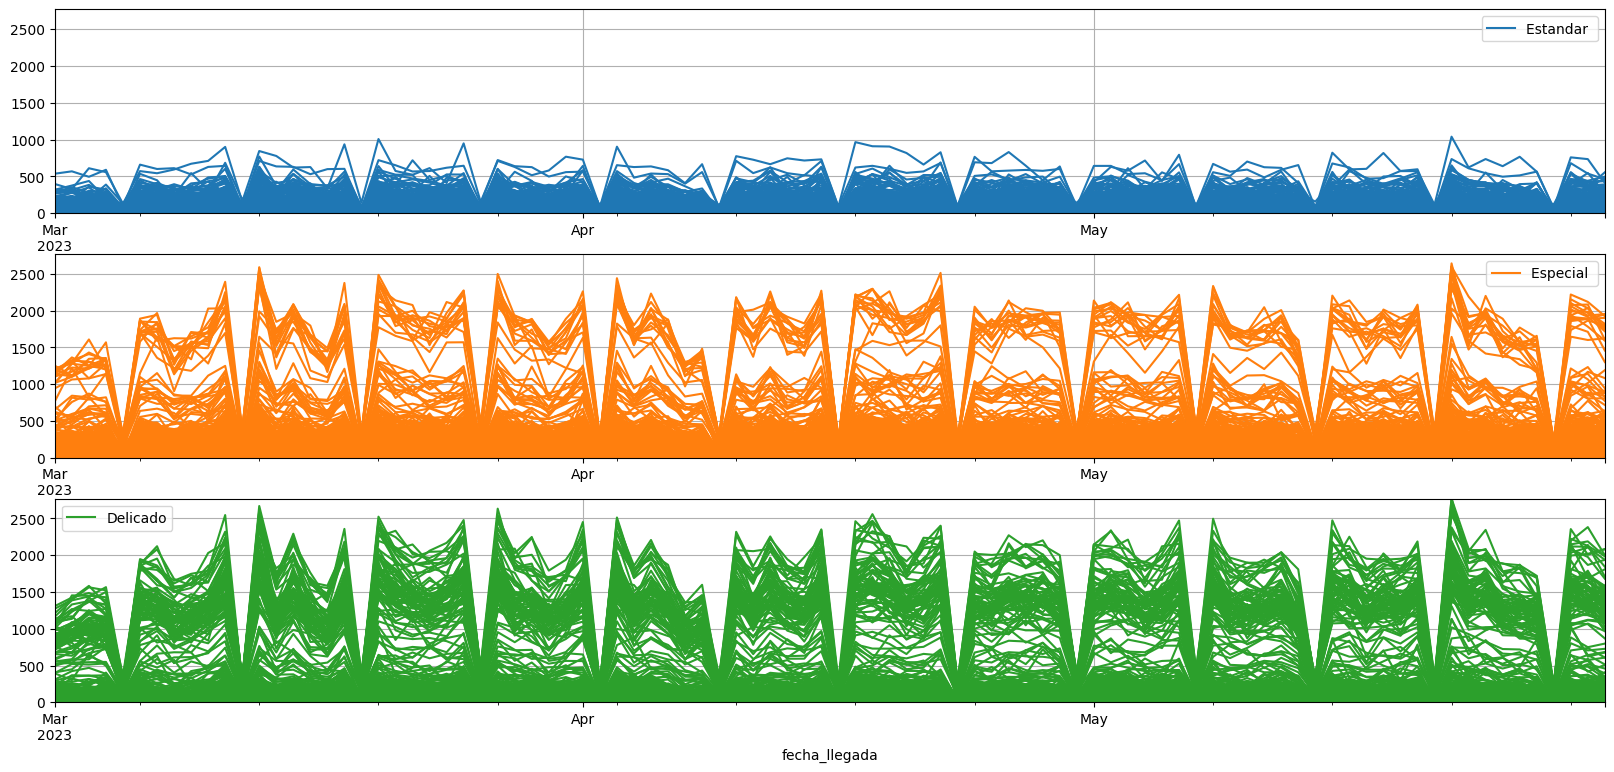

In [12]:

skus_matcat_dict = skus_matcat.set_index('sku')['categoria_material'].to_dict()

# Assign colors by subcategory
unique_categories_material = skus_matcat['categoria_material'].unique()

fig, axs = plt.subplots(len(skus_matcat['categoria_material'].unique()), figsize = (20,len(skus_matcat['categoria_material'].unique()) * 3))

# Calculate the overall max demand across all SKUs in the DataFrame
global_max_demand = df.max().max()

# Define color palette
colors = plt.cm.tab10(range(len(unique_categories_material)))  # Assign a color per category

# Loop over each category to create a separate DataFrame for each and plot it
for idx, category_material in enumerate(unique_categories_material):
    # Select SKUs that belong to the current category
    skus_in_category = [sku for sku, cat in skus_matcat_dict.items() if cat == category_material]
    
    # Filter the main DataFrame to include only these SKUs
    category_df = df[skus_in_category]
    
    # Plot the sum of demand for this category over time
    category_df.plot(ax=axs[idx], color=colors[idx], legend=False)
    
    # Set the y-limit for each subplot to the global maximum demand
    axs[idx].set_ylim(0, global_max_demand)
    
    # Add details to plot
    axs[idx].legend([category_material])
    axs[idx].grid()

plt.show()

In [13]:
# Plot demand by sum of quantity per date per subcategory
df_subcats = pd.read_sql('select mel.fecha_llegada, sum(mel.quantity) as sum_quantity, cp.subcategoria from Demanda_Historica_Melted as mel left join main.Catalogo_Productos as cp on cp.sku = mel.SKU group by mel.fecha_llegada, subcategoria', con)

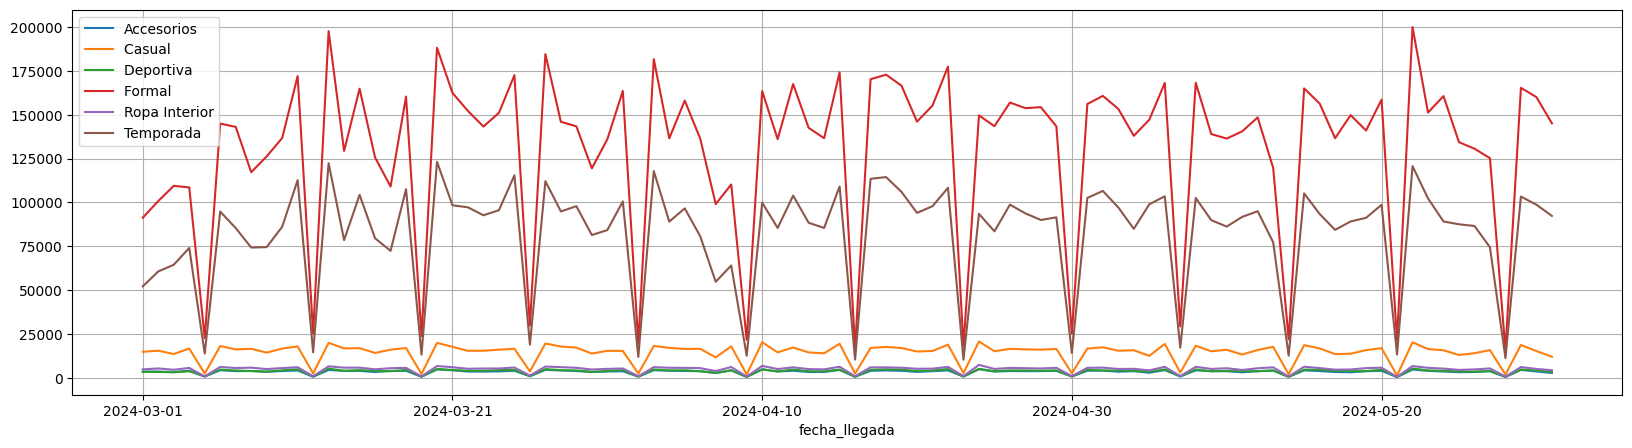

In [14]:
fig, ax = plt.subplots(figsize=(20, 5))

for cat in df_subcats['subcategoria'].unique():
    temp_df = df_subcats[df_subcats['subcategoria'] == cat]
    temp_df.plot(x='fecha_llegada', y='sum_quantity', ax=ax, label=cat)

# Add details to plot
ax.grid()
plt.show()


In [15]:
# Plot demand by sum of quantity per date per subcategory
df_nomprods = pd.read_sql('select mel.fecha_llegada, sum(mel.quantity) as sum_quantity, cp.nombre_producto from Demanda_Historica_Melted as mel left join main.Catalogo_Productos as cp on cp.sku = mel.SKU group by mel.fecha_llegada, nombre_producto', con)

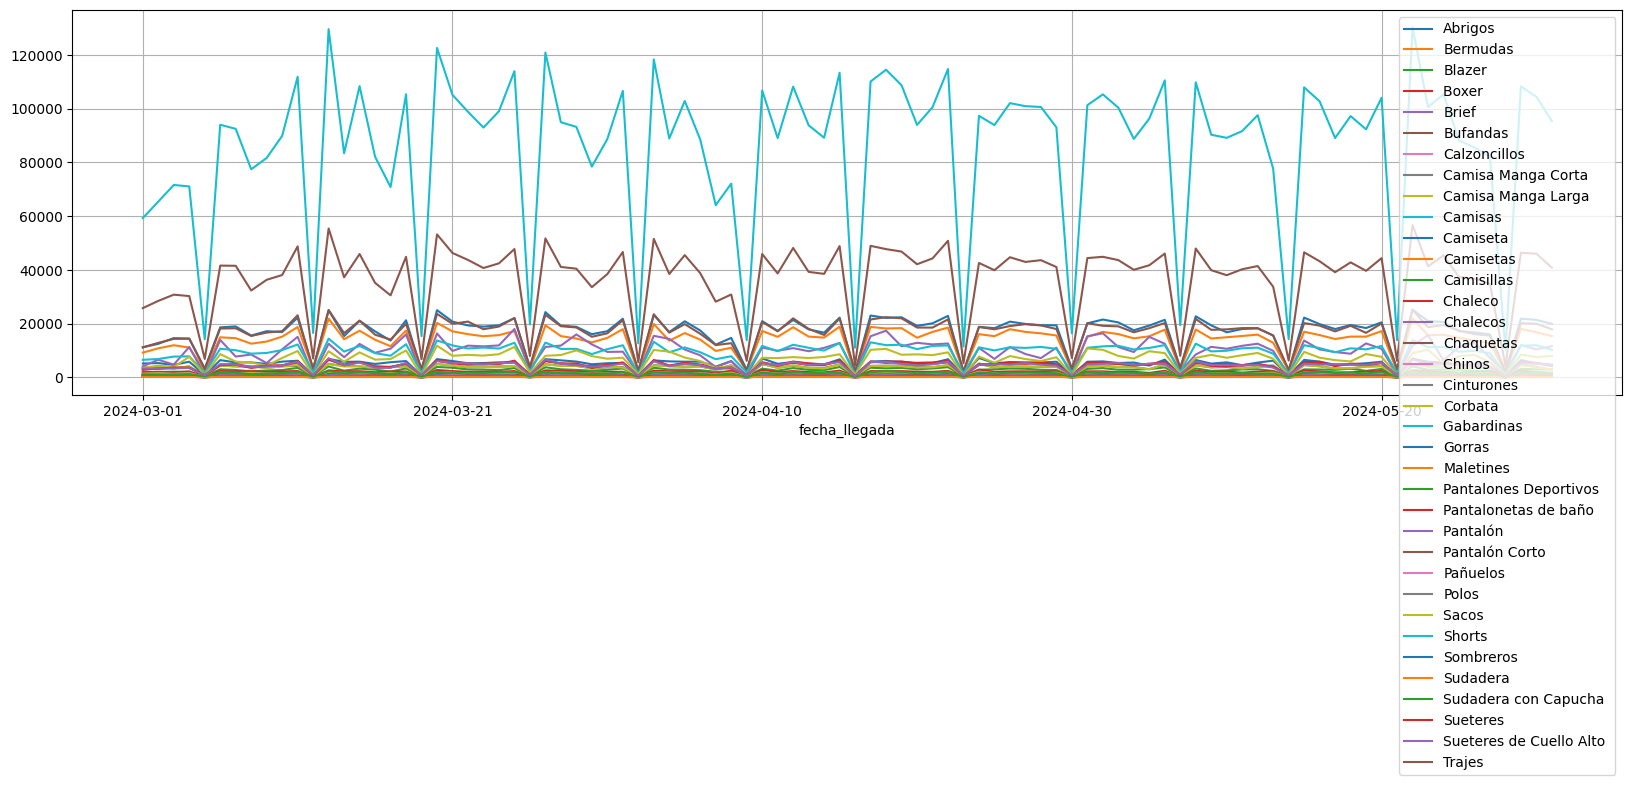

In [16]:
fig, ax = plt.subplots(figsize=(20, 5))

for cat in df_nomprods['nombre_producto'].unique():
    temp_df = df_nomprods[df_nomprods['nombre_producto'] == cat]
    temp_df.plot(x='fecha_llegada', y='sum_quantity', ax=ax, label=cat)

# Add details to plot
ax.grid()
plt.show()

In [17]:
# Function to get dictionary of nombre_producto

def getDictNombreProducto():
    # Query SKUs and product names
    sql_nombre_producto_por_sku = pd.read_sql_query('select sku, nombre_producto from Catalogo_Productos;', con)
    
    # Get unique product names
    sql_nombre_producto_unique = sql_nombre_producto_por_sku['nombre_producto'].unique()
    
    # Create dictionary for product-level DataFrames
    dict_nombre_producto_dfs = {}

    for name in sql_nombre_producto_unique:
        # Filter SKUs by product name
        skus_per_name = sql_nombre_producto_por_sku.loc[sql_nombre_producto_por_sku['nombre_producto'] == name, 'sku'].tolist()
        
        # Ensure SKUs exist in the DataFrame
        skus_per_name = [sku for sku in skus_per_name if sku in df.columns]
        
        # Filter main DataFrame
        skus_per_name_df = df[skus_per_name]
        dict_nombre_producto_dfs[name] = skus_per_name_df

    # Create dictionary for aggregated daily demand
    dict_nombre_producto_daily_demand = {}

    for cat, skus_df in dict_nombre_producto_dfs.items():
        # Ensure index is datetime
        skus_df.index = pd.to_datetime(skus_df.index, errors='coerce')
        if skus_df.index.isnull().any():
            raise ValueError("Invalid datetime format in index.")
        
        # Aggregate demand if DataFrame is not empty
        if not skus_df.empty:
            dict_nombre_producto_daily_demand[cat] = skus_df.sum(axis=1)
        else:
            dict_nombre_producto_daily_demand[cat] = pd.Series(dtype=float)
    
    return dict_nombre_producto_daily_demand, sql_nombre_producto_unique, dict_nombre_producto_dfs


dict_nombre_producto_daily_demand, sql_nombre_producto_unique, dict_nombre_producto_dfs = getDictNombreProducto()

In [ ]:
## Plot all daily demand per nombre_producto
#
#fig, axs = plt.subplots(len(sql_nombre_producto_unique), figsize=(20, len(sql_nombre_producto_unique) * 3))
#
## Calculate the overall max demand across all SKUs in the DataFrame
##global_max_demand = df.max().max()
#global_max_demand = 200000
#
## Loop over each category to create a separate DataFrame for each and plot it
#for idx, name in enumerate(sql_nombre_producto_unique):  
#    # Plot the sum of demand for this category over time
#    dict_nombre_producto_daily_demand[name].plot(ax=axs[idx], legend=False)
#    
#    # Set the y-limit for each subplot to the global maximum demand
#    axs[idx].set_ylim(0, global_max_demand)
#    
#    # Add details to plot
#    axs[idx].legend([name])
#    axs[idx].grid()
#
##plt.show()

c:\Users\lemon\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\lemon\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\lemon\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\lemon\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\lemon\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retval

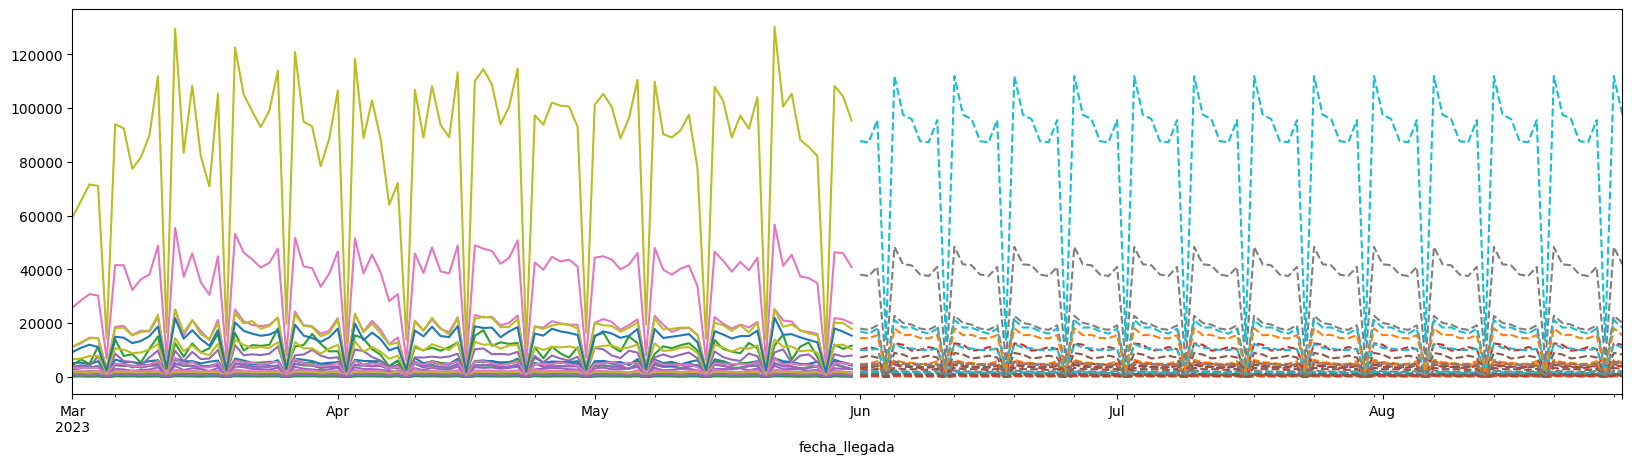

In [25]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fig, ax = plt.subplots(figsize = (20,5))

for category, df in dict_nombre_producto_daily_demand.items():
    # Fit the Holt-Winters model
    model = ExponentialSmoothing(dict_nombre_producto_daily_demand[category], trend=None, seasonal='add', seasonal_periods=7, freq='D').fit()
    forecast = model.forecast(90)   
    forecast_dates = pd.date_range(dict_nombre_producto_daily_demand[category].index[-1] + pd.Timedelta(days=1), periods=90)
    forecast_df = pd.DataFrame({
        'Historical Demand': dict_nombre_producto_daily_demand[category],
        'Forecasted Demand': forecast
    }, index=dict_nombre_producto_daily_demand[category].index.append(forecast_dates))


    # Plot the historical demand and forecasted demand
    dict_nombre_producto_daily_demand[category].plot(ax=ax, label='Demand')
    forecast_df['Forecasted Demand'].plot(ax=ax, label='Forecast', linestyle='--')

plt.show()

<Axes: xlabel='fecha_llegada'>

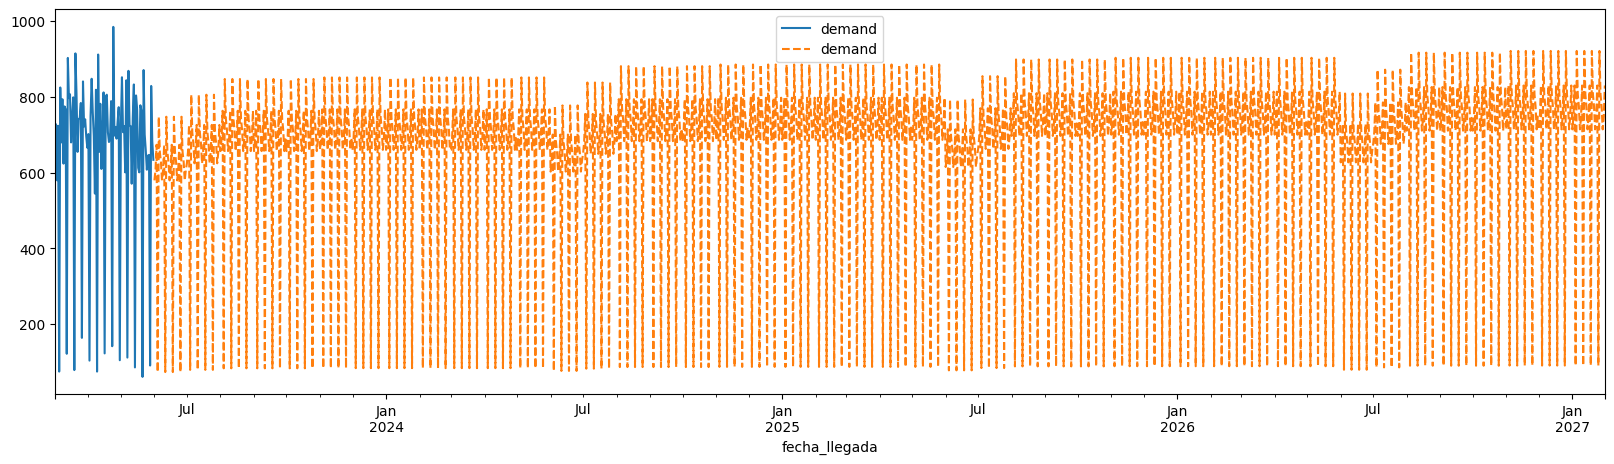

In [20]:
from pandas.tseries.offsets import MonthEnd

# Load the demand changes table
df_dv = pd.read_csv('./data/sd_competencia/variaciondemanda_1.csv')
df_dv = df_dv.drop(columns={'subcategoria'})
df_dv = df_dv.set_index('nombre_producto')

# Extract the row for "Calzoncillos"
calzoncillos_multipliers = df_dv.loc['Calzoncillos']

calzoncillos_multipliers.index = pd.to_datetime(calzoncillos_multipliers.index)

# Getting daily "Calzoncillos" demand
daily_demand = dict_nombre_producto_daily_demand['Calzoncillos']

start_date = daily_demand.index[-1] + pd.Timedelta(days=1)
forecast_dates = pd.date_range(start=start_date, end='2027-01-01', freq='MS')

# Initialize forecast dataframe
forecast_df = pd.DataFrame({'fecha_llegada':daily_demand.index, 'demand': daily_demand.values})

# Iterate through first day of each month
for i, start_idx in enumerate(forecast_dates):
    
    forecast_horizon_days = len(pd.date_range(start=start_idx, end=start_idx + MonthEnd(0), freq='D'))# - 1

    model = ExponentialSmoothing(daily_demand, trend=None, seasonal='add', seasonal_periods=7, freq='D').fit()
    forecast = model.forecast(forecast_horizon_days)
    
    fc_temp_df = pd.DataFrame({'fecha_llegada':pd.date_range(start=start_idx, periods=forecast_horizon_days, freq='D'), 'demand':forecast.values * calzoncillos_multipliers.values[i]})
    forecast_df = pd.concat([forecast_df, fc_temp_df])

    
forecast_df = forecast_df.set_index('fecha_llegada')

# Separating dfs
hist_df = forecast_df[forecast_df.index < pd.to_datetime('2023-06-01')]
fc_df = forecast_df[(forecast_df.index >= pd.to_datetime('2023-06-01'))]

# Plotting
fig, ax = plt.subplots(figsize=(20,5))

hist_df.plot(ax=ax)
fc_df.plot(ax=ax, linestyle='--')

c:\Users\lemon\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\lemon\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\lemon\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\lemon\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\lemon\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retval

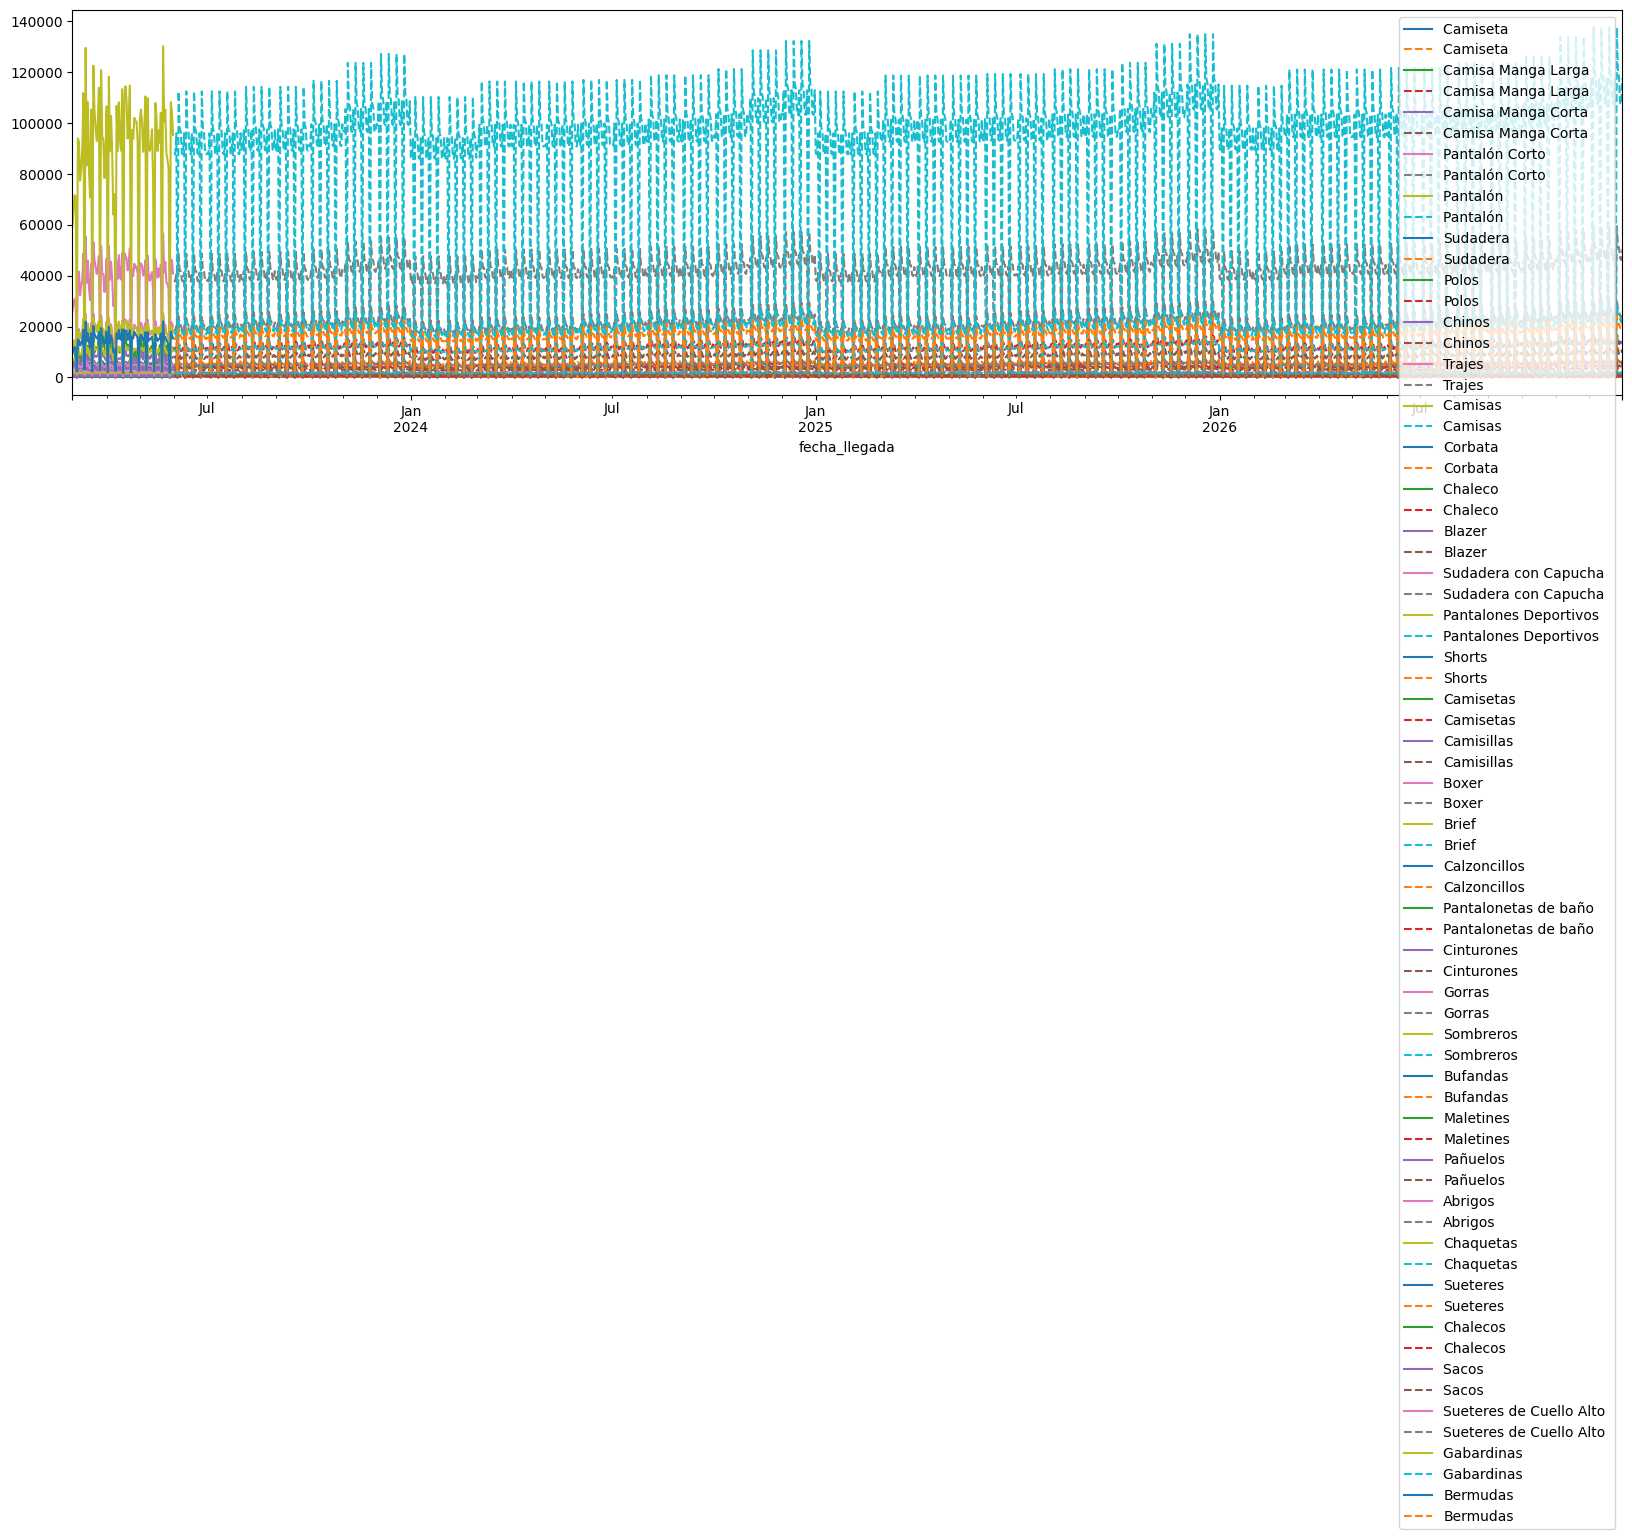

In [49]:
from pandas.tseries.offsets import MonthEnd

# Load the demand changes table
df_dv = pd.read_csv('./data/sd_competencia/variaciondemanda_2.csv')
df_dv = df_dv.drop(columns={'subcategoria'})
df_dv = df_dv.set_index('nombre_producto')

fig, ax = plt.subplots(figsize = (20,5))

nombre_producto_forecast_dfs = {}

for nombre_prod, cont_nombre_prod in dict_nombre_producto_daily_demand.items():

    # Extract the row for "Calzoncillos"
    demand_multipliers = df_dv.loc[nombre_prod]

    # Converting index to datetimes
    demand_multipliers.index = pd.to_datetime(demand_multipliers.index)

    # Getting daily "Calzoncillos" demand
    daily_nombre_prod_demand = dict_nombre_producto_daily_demand[nombre_prod]

    # Getting start date for forecasting and date range
    start_date = daily_nombre_prod_demand.index[-1] + pd.Timedelta(days=1)
    forecast_dates = pd.date_range(start=start_date, end='2026-12-31', freq='MS')
    
    # Initialize forecast dataframe
    forecast_df = pd.DataFrame({'fecha_llegada':daily_nombre_prod_demand.index, 'demand': daily_nombre_prod_demand.values})

    # Iterate through first day of each month
    for i, start_idx in enumerate(forecast_dates):
        
        forecast_horizon_days = len(pd.date_range(start=start_idx, end=start_idx + MonthEnd(0), freq='D'))# - 1

        model = ExponentialSmoothing(daily_nombre_prod_demand, trend=None, seasonal='add', seasonal_periods=7, freq='D').fit()
        forecast = model.forecast(forecast_horizon_days)
        
        fc_temp_df = pd.DataFrame({'fecha_llegada':pd.date_range(start=start_idx, periods=forecast_horizon_days, freq='D'), 'demand':forecast.values * demand_multipliers.values[i]})
        
        forecast_df = pd.concat([forecast_df, fc_temp_df])

        
    forecast_df = forecast_df.set_index('fecha_llegada')

    # Separating dfs
    hist_df = forecast_df[forecast_df.index < pd.to_datetime('2023-06-01')]
    fc_df = forecast_df[(forecast_df.index >= pd.to_datetime('2023-06-01'))]
    #fc_df = forecast_df[(forecast_df.index >= pd.to_datetime('2023-06-01')) & (forecast_df.index <= pd.to_datetime('2023-07-01'))]

    hist_df.plot(y='demand', ax=ax, label=nombre_prod)
    fc_df.plot(y='demand', ax=ax, label=nombre_prod, linestyle='--')
    
    nombre_producto_forecast_dfs[nombre_prod] = forecast_df

In [61]:
# Initialize an empty DataFrame to store the consolidated data
nombre_producto_forecast_general_df = pd.DataFrame()

# Loop through each product's DataFrame in the dictionary
for key, df in nombre_producto_forecast_dfs.items():
    # Add a new column with the product name
    df['product'] = key
    
    # Append this DataFrame to the general DataFrame
    nombre_producto_forecast_general_df = pd.concat([nombre_producto_forecast_general_df, df])

# Resulting DataFrame
nombre_producto_forecast_general_df['demand'] = pd.to_numeric(nombre_producto_forecast_general_df['demand']).round()
nombre_producto_forecast_general_df.to_csv('./data/sd_competencia/sd_competencia_pronostico_demanda.csv', encoding='utf-8-sig')

# Initialize an empty DataFrame to store the consolidated data
nombre_producto_forecast_general_df = pd.DataFrame()

# Loop through each product's DataFrame in the dictionary
for key, df in nombre_producto_forecast_dfs.items():
    # Ensure the index is consistent across all DataFrames
    df = df.copy()
    df = df[['demand']].rename(columns={'demand': key})
    
    # Convert values to numeric and round them
    df[key] = pd.to_numeric(df[key], errors='coerce').round()
    
    # Merge each product's data into the general DataFrame
    if nombre_producto_forecast_general_df.empty:
        nombre_producto_forecast_general_df = df
    else:
        nombre_producto_forecast_general_df = nombre_producto_forecast_general_df.join(df, how='outer')

# Save the resulting DataFrame to a CSV file
nombre_producto_forecast_general_df.to_csv(
    './data/sd_competencia/sd_competencia_pronostico_demanda_pivot.csv',
    encoding='utf-8-sig'
)

